# Exploratory data analysis on “airquality” dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data=pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/airquality.csv')

In [4]:
data=data.drop(columns=['Unnamed:0'],errors='ignore')
#display first 5 rows
print("--Head of Data--")
print(data.head())

--Head of Data--
   rownames  Ozone  Solar.R  Wind  Temp  Month  Day
0         1   41.0    190.0   7.4    67      5    1
1         2   36.0    118.0   8.0    72      5    2
2         3   12.0    149.0  12.6    74      5    3
3         4   18.0    313.0  11.5    62      5    4
4         5    NaN      NaN  14.3    56      5    5


In [5]:
# summary
print("--Data Information")
data.info()

--Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  153 non-null    int64  
 1   Ozone     116 non-null    float64
 2   Solar.R   146 non-null    float64
 3   Wind      153 non-null    float64
 4   Temp      153 non-null    int64  
 5   Month     153 non-null    int64  
 6   Day       153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.5 KB


In [6]:
# Check for missing values
print("--Missing Value Count--")
print(data.isnull().sum())

--Missing Value Count--
rownames     0
Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
dtype: int64


In [9]:
# Descriptive Statistics
print("\n---Descriptive Statistics---\n")
print(data.describe())


---Descriptive Statistics---

         rownames       Ozone     Solar.R        Wind        Temp       Month  \
count  153.000000  116.000000  146.000000  153.000000  153.000000  153.000000   
mean    77.000000   42.129310  185.931507    9.957516   77.882353    6.993464   
std     44.311398   32.987885   90.058422    3.523001    9.465270    1.416522   
min      1.000000    1.000000    7.000000    1.700000   56.000000    5.000000   
25%     39.000000   18.000000  115.750000    7.400000   72.000000    6.000000   
50%     77.000000   31.500000  205.000000    9.700000   79.000000    7.000000   
75%    115.000000   63.250000  258.750000   11.500000   85.000000    8.000000   
max    153.000000  168.000000  334.000000   20.700000   97.000000    9.000000   

              Day  
count  153.000000  
mean    15.803922  
std      8.864520  
min      1.000000  
25%      8.000000  
50%     16.000000  
75%     23.000000  
max     31.000000  


In [15]:
# Data Cleaning: Drop NA rows for initial visualization
data_clean=data.dropna()
df=data_clean.describe()
print(df)
print(f"\nOriginal Rows:{len(data)}, Clean Rows:{len(data_clean)}")

         rownames       Ozone     Solar.R        Wind        Temp       Month  \
count  111.000000  111.000000  111.000000  111.000000  111.000000  111.000000   
mean    83.945946   42.099099  184.801802    9.939640   77.792793    7.216216   
std     46.030985   33.275969   91.152302    3.557713    9.529969    1.473434   
min      1.000000    1.000000    7.000000    2.300000   57.000000    5.000000   
25%     45.500000   18.000000  113.500000    7.400000   71.000000    6.000000   
50%     89.000000   31.000000  207.000000    9.700000   79.000000    7.000000   
75%    124.500000   62.000000  255.500000   11.500000   84.500000    9.000000   
max    153.000000  168.000000  334.000000   20.700000   97.000000    9.000000   

              Day  
count  111.000000  
mean    15.945946  
std      8.707194  
min      1.000000  
25%      9.000000  
50%     16.000000  
75%     22.500000  
max     31.000000  

Original Rows:153, Clean Rows:111


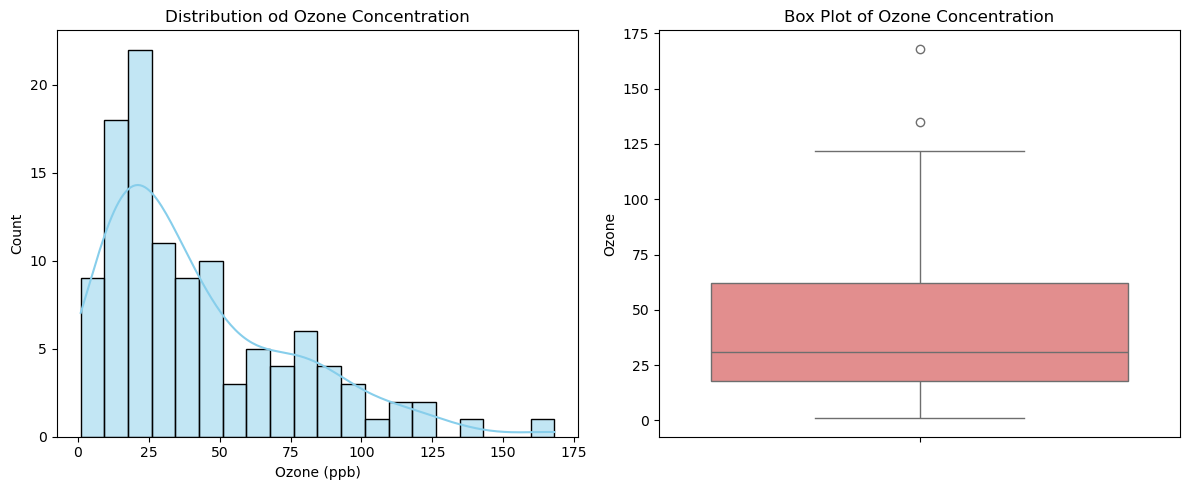

In [22]:
# A. Univariate Distribution (Histogram and Box Plot)
plt.figure(figsize=(12,5))

# Histogram for Ozone
plt.subplot(1,2,1) # 1 row, 2 columns, 1st plot
sns.histplot(data_clean['Ozone'],kde=True,bins=20,color='skyblue')
plt.title('Distribution od Ozone Concentration')
plt.xlabel('Ozone (ppb)')

# Box Plot for Ozone
plt.subplot(1,2,2) # 1 row, 2 columns, 2nd plot
sns.boxplot(y=data_clean['Ozone'],color='lightcoral')
plt.title('Box Plot of Ozone Concentration')
plt.tight_layout()
plt.show()

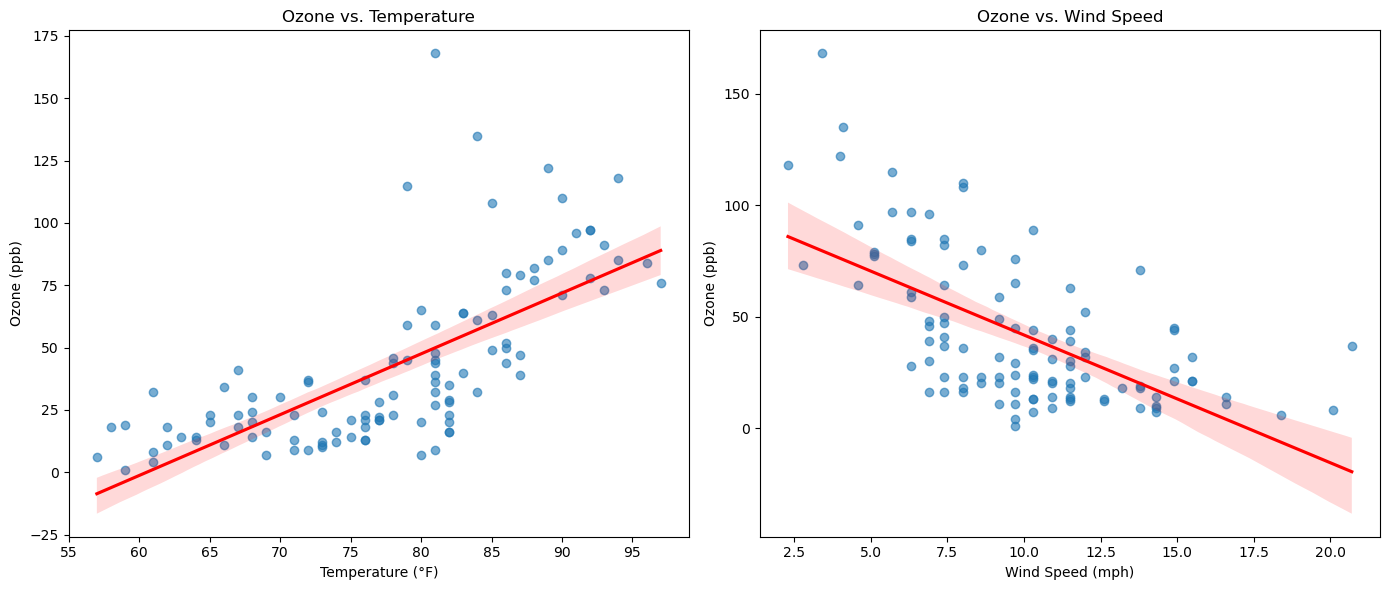

In [26]:
# B. Bivariate Relationship (Scatter Plots)
plt.figure(figsize=(14,6))
# Scatter Plot: Ozone vs. Temperature
plt.subplot(1,2,1)
sns.regplot(x='Temp',y='Ozone',data=data_clean,scatter_kws={'alpha':0.6},line_kws={'color':'red'})
plt.title('Ozone vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ozone (ppb)')

# Scatter Plot: Ozone vs. Wind Speed
plt.subplot(1,2,2)
sns.regplot(x='Wind',y='Ozone',data=data_clean,scatter_kws={'alpha':0.6},line_kws={'color':'red'})
plt.title('Ozone vs. Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Ozone (ppb)')
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18272\1412049203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Month_str']=data_clean['Month'].astype(str)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18272\1412049203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month_str',y='Ozone',data=data_clean, palette='viridis')


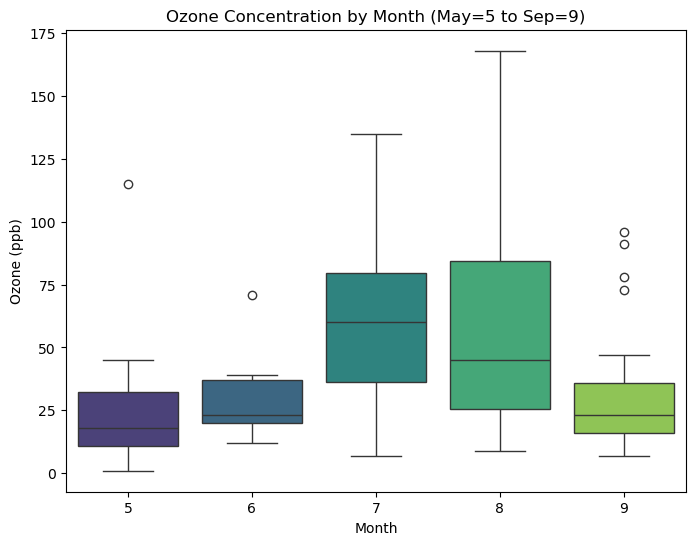

In [25]:
# C. Categorical Analysis (Monthly Trends)
# Convert month to a string/categorical for visualization
data_clean['Month_str']=data_clean['Month'].astype(str)
# Boxplot of Ozone by Month
plt.figure(figsize=(8,6))
sns.boxplot(x='Month_str',y='Ozone',data=data_clean, palette='viridis')
plt.title('Ozone Concentration by Month (May=5 to Sep=9)')
plt.xlabel('Month')
plt.ylabel('Ozone (ppb)')
plt.show()